<a href="https://colab.research.google.com/github/HST0077/HYOTC/blob/main/MarketRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2024년 1월 1일부터 2024년 12월1일까지의 애플 주식 수정주가를 바탕으로 단순 수익율 기반의 monthly return을 구하고, 이 수익율의 표본 분산과 모집단 분산을 각각 구하여라.

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch Historical Stock Data
ticker = 'AAPL' # Example: Apple Inc.
start_date = '2024-01-01'
end_date = '2024-12-01'

# Download daily adjusted closing prices
stock_data = yf.download(ticker , start=start_date , end=end_date)['Close']

# Step 2: Calculate Daily Returns
daily_returns = stock_data.pct_change().dropna()

# Step 3: Resample to Monthly Returns (수익율을 resample한게 아니고, 주가를 resample하여야 함)
monthly_returns = stock_data.resample('ME').ffill().pct_change().dropna()

# Step 4: Calculate Sample Variance (Unbiased Estimator)
sample_variance = monthly_returns.var(ddof=1).item() # ddof=1 for sample variance

# Step 5: Calculate Population Variance (Biased Estimator)
population_variance = monthly_returns.var(ddof=0).item() # ddof=0 for population variance

print(f"Sample Variance (Unbiased Estimator): {sample_variance:.4%}")
print(f"Population Variance (Biased Estimator): {population_variance:.4%}")
print(f"\n Sample Variance (Unbiased Estimator): {sample_variance:.4%}")
print(f"Population Variance (Biased Estimator): {population_variance:.4%}")

/tmp/ipython-input-3553264123.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker , start=start_date , end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed

Sample Variance (Unbiased Estimator): 0.3275%
Population Variance (Biased Estimator): 0.2947%

 Sample Variance (Unbiased Estimator): 0.3275%
Population Variance (Biased Estimator): 0.2947%


# 2024년 1월 1일부터 2024년 12월1일까지의 애플 주식 수정주가를 바탕으로 단순 수익율 기반의 daily return을 구하고, 이 시계열 데이터가 자기상관(autocorrelation)이 존재하는지 그래프를 그려보아라.

/tmp/ipython-input-1444277874.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker , start=start_date , end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Partial Autocorrelation')

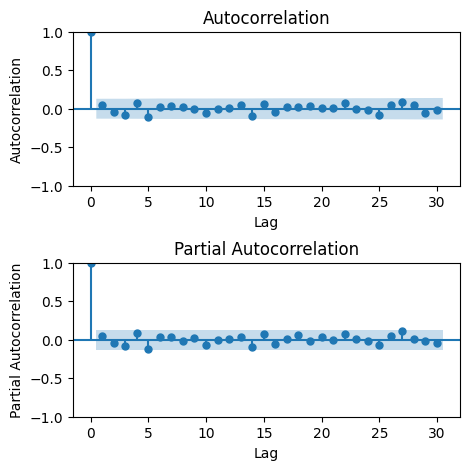

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.stattools import acf

# Fetch Historical Stock Data
ticker = 'AAPL' # Example: Apple Inc.
start_date = '2024-01-01'
end_date = '2024-12-01'

# Download daily adjusted closing prices
stock_data = yf.download(ticker , start=start_date , end=end_date)['Close']

# Create a figure with two subplots side by side
fig, axes = plt.subplots(2, 1, figsize=(5, 5))
fig.subplots_adjust(hspace=0.5)  # 세로 간격

# Autocorrelation Function (ACF) Plot
plot_acf(daily_returns , lags=30, alpha=0.05, ax=axes[0])
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Autocorrelation')

# Partial Autocorrelation Function (PACF) Plot
plot_pacf(daily_returns , lags=30, alpha=0.05, ax=axes[1])
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Partial Autocorrelation')

In [1]:
# cumprod, cummax의 이해
import numpy as np
import pandas as pd

D=np.random.randint(1,6,5)
df=pd.DataFrame(data={'origin':D})
df['cumprod']=df['origin'].cumprod()
df['cummax']=df['origin'].cummax()
df


,origin,cumprod,cummax
0,4,4,4
1,2,8,4
2,5,40,5
3,4,160,5
4,4,640,5


# 2024년 1월 1일부터 2024년 12월1일까지의 애플 주식 수정주가를 바탕으로 단순 수익율 기반의 daily return을 구하고, Maximum DrawDown 수치를 확인하라.

/tmp/ipython-input-609391481.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker , start=start_date , end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed



Maximum Drawdown: -15.35%


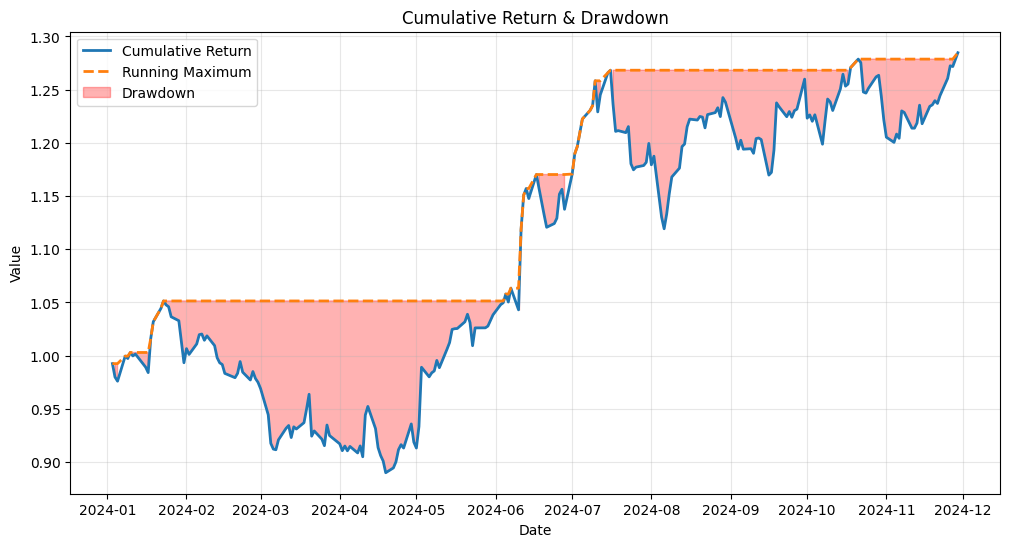

In [15]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch Historical Stock Data
ticker = 'AAPL' # Example: Apple Inc.
start_date = '2024-01-01'
end_date = '2024-12-01'

# Download daily adjusted closing prices
stock_data = yf.download(ticker , start=start_date , end=end_date)['Close']

# Step 2: Calculate Daily Returns
daily_returns = stock_data.pct_change().dropna()

# Step 3: Calculate Cumulative Returns
cumulative_returns = (1 + daily_returns).cumprod()

# Step 4: Calculate Running Maximum
running_max = cumulative_returns.cummax()

# Step 5: Calculate Drawdown
drawdown = (cumulative_returns - running_max) / running_max

# Step 6: Calculate Max Drawdown
max_drawdown = drawdown.min().item() * 100 # Convert to percentage
print(f"\nMaximum Drawdown: {max_drawdown:.2f}%")

# Step 7: Visualization of Cumulative Returns and Drawdown
plt.figure(figsize=(12, 6))  # 가독성 좋은 사이즈

# 혹시 DataFrame이면 Series로 변환
cumulative_returns = cumulative_returns.squeeze()
running_max = running_max.squeeze()

# 1️⃣ 누적 수익률
plt.plot(
    cumulative_returns.index,
    cumulative_returns,
    label='Cumulative Return',
    linewidth=2
)

# 2️⃣ 러닝 맥스 (과거 최고점)
plt.plot(
    running_max.index,
    running_max,
    label='Running Maximum',
    linestyle='--',
    linewidth=2
)

# 3️⃣ 드로우다운 영역
# ‘fill_between(x,y1,y2)’은 x를 축으로 두 곡선 y1, y2를 ‘where’라는 parameter를 이용하여 영역을 정의하고 색으로 채워서 강조해 주는 함수이다.
plt.fill_between(
    cumulative_returns.index,
    cumulative_returns,
    running_max,
    where=(cumulative_returns < running_max),  # ✅ drawdown 구간만 채우기
    color='red',
    alpha=0.3,
    label='Drawdown'
)

plt.legend()
plt.grid(alpha=0.3)
plt.title("Cumulative Return & Drawdown")
plt.xlabel("Date")
plt.ylabel("Value")

plt.show()


# 어떤 포트폴리오의 6개월간의 수익은 평균이 $2mil. 이며, 표준편차가 $10mil.인 정규분포를 따르고 있다. 99% 신뢰도를 바탕으로 했을 때, 향후 6개월 동안 이 포트폴리오의 최대 손실은 얼마라고 봐야 할까?

In [ ]:
from scipy.stats import norm

V=norm.ppf(0.01,2,10)
print('99% 6 mo. VaR:', -V)

99% 6 mo. VaR: 21.26347874040841


# 2024년 1월 1일부터 2024년 12월1일까지의 애플 주식 수정주가를 바탕으로 95% 신뢰수준 하에서 Historical VaR를 구하여라.

/tmp/ipython-input-961568700.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker , start=start_date , end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed


Historical Simulation VaR at 95.0%confidence level: -2.18%


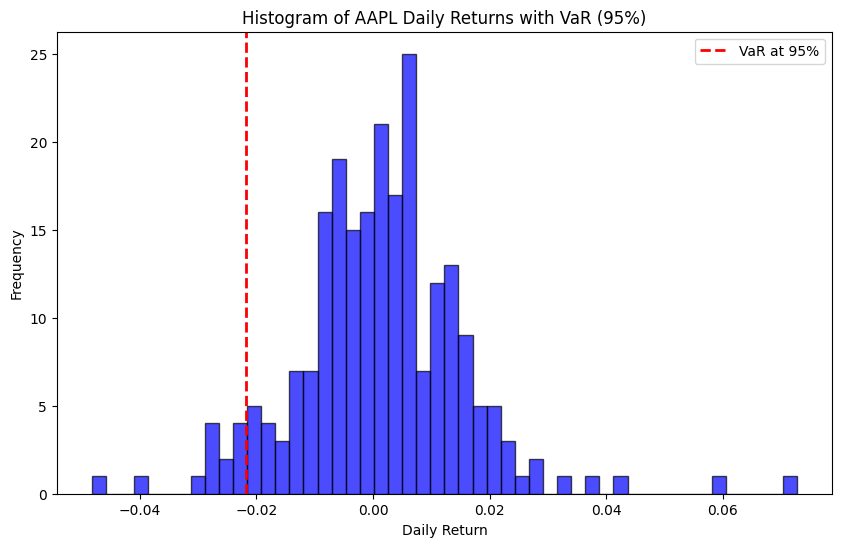

In [17]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch Historical Stock Data
ticker = 'AAPL' # Example: Apple Inc.
start_date = '2024-01-01'
end_date = '2024-12-01'

# Download daily adjusted closing prices
stock_data = yf.download(ticker , start=start_date , end=end_date)['Close']

# Step 2: Calculate Daily Returns
daily_returns = stock_data.pct_change().dropna()

# Historical Simulation VaR
confidence_level = 0.95
VaR_hist = np.percentile(daily_returns , (1 - confidence_level) *100)
print(f"Historical Simulation VaR at {confidence_level*100}%confidence level: {VaR_hist:.2%}")

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.hist(
    daily_returns,
    bins=50,
    alpha=0.7,
    color='blue',
    edgecolor='black'
)

plt.axvline(
    x=VaR_hist,
    color='red',
    linestyle='dashed',
    linewidth=2,
    label=f'VaR at {confidence_level * 100:.0f}%'
)

plt.title(
    f'Histogram of {ticker} Daily Returns with VaR '
    f'({confidence_level * 100:.0f}%)'
)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

plt.legend()
plt.show()


# 2024년 1월 1일부터 2024년 12월1일까지의 애플 주식 수정주가를 바탕으로 95% 신뢰수준 하에서 Parametric VaR를 구하여라.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

#  Fetch Historical Stock Data
ticker = 'AAPL' # Example: Apple Inc.
start_date = '2024-01-01'
end_date = '2024-12-01'

# Download daily adjusted closing prices
stock_data = yf.download(ticker , start=start_date , end=end_date)['Close'].squeeze()

# Calculate Daily Returns
daily_returns = stock_data.pct_change().dropna()

# 평균과 표준편차 (일간 수익률 기준)
mu = daily_returns.mean()
sigma = daily_returns.std()


# -----------------------------
# Variance-Covariance VaR
# -----------------------------

from scipy.stats import norm

confidence_level = 0.95

# 신뢰수준에 해당하는 z-score
z_score = norm.ppf(confidence_level)

# -----------------------------
# Portfolio Value (normalized)
# -----------------------------
P0 = 1  # 포트폴리오 가치 정규화

# -----------------------------
# VaR 계산
# -----------------------------
VaR_var_cov = P0 * (sigma * z_score - mu)

print(
    f"Variance-Covariance VaR at "
    f"{confidence_level * 100:.0f}% confidence level: "
    f"-{VaR_var_cov:.2%}"
)


/tmp/ipython-input-1320744285.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker , start=start_date , end=end_date)['Close'].squeeze()
[*********************100%***********************]  1 of 1 completed


Variance-Covariance VaR at 95% confidence level: -2.26%


#현재 기초자산의 가격이 100이고, 일간 기대수익율은 0%, 일간 변동성은 약 2%라고 한다. 이 자산의 95% 신뢰도 하에서 1-day MC simulation VaR를 계산하여라.

In [11]:
import numpy as np

# 초기 설정
initial_price = 100          # 기초자산 가격
mu = 0.0                     # 일간 기대수익률 (0%)
sigma = 0.02                 # 일간 변동성 (2%)
confidence_level = 0.95      # 95% 신뢰도
n_simulations = 100000       # 몬테카를로 시뮬레이션 수

# 시뮬레이션: 로그 수익률 생성
np.random.seed(42)  # 재현 가능성
log_returns = np.random.normal(loc=mu, scale=sigma, size=n_simulations)

# 자산 가격 변화
simulated_prices = initial_price * np.exp(log_returns)

# 손익 계산
profit_loss = simulated_prices - initial_price

# VaR 계산
var_95 = -np.percentile(profit_loss, (1 - confidence_level) * 100)

print(f"1-Day Monte Carlo VaR (95% 신뢰도): {var_95:.2f}")


1-Day Monte Carlo VaR (95% 신뢰도): 3.23


#현재 기초자산의 가격이 100이고, 일간 기대수익율은 0%, 일간 변동성은 약 2%라고 한다. 이 자산의 95% 신뢰도 하에서 1-day MC simulation VaR를 계산하여라.

In [12]:
import numpy as np

# 초기 설정
initial_price = 100
mu = 0.0
sigma = 0.02
confidence_level = 0.95
n_simulations = 100000

# 시뮬레이션
np.random.seed(42)
log_returns = np.random.normal(loc=mu, scale=sigma, size=n_simulations)
simulated_prices = initial_price * np.exp(log_returns)
profit_loss = simulated_prices - initial_price

# VaR 계산
var_95 = -np.percentile(profit_loss, (1 - confidence_level) * 100)

# Expected Shortfall 계산 (VaR를 초과하는 손실들의 평균)
expected_shortfall_95 = -profit_loss[profit_loss < -var_95].mean()

print(f"1-Day Monte Carlo VaR (95% 신뢰도): {var_95:.2f}")
print(f"1-Day Monte Carlo Expected Shortfall (95% 신뢰도): {expected_shortfall_95:.2f}")


1-Day Monte Carlo VaR (95% 신뢰도): 3.23
1-Day Monte Carlo Expected Shortfall (95% 신뢰도): 4.04
